In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [40]:
# Load dataset
file_path = 'D:\Tugas Akhir\Stroke\data_train.csv'
df = pd.read_csv(file_path)

# Pisahkan fitur dan target
X = df.drop('stroke', axis=1)
y = df['stroke']

In [41]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,1,"0,1579",0,0,0,0,1,0,1,"0,1477","0,5599",1,0,0,0,0
1,1,"0,3509",0,0,0,0,0,1,0,"0,1536","0,3719",0,0,1,0,0
2,1,"0,4912",1,1,1,0,1,0,0,"0,6513","0,2810",0,0,0,1,0
3,0,"0,3158",0,0,0,1,0,0,0,"0,1349","0,3864",0,0,0,1,0
4,1,"0,9474",0,0,1,0,0,1,0,"0,1067","0,4277",1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,1,"0,0175",0,0,1,0,1,0,1,"0,0403","0,1302",0,0,1,0,0
2947,0,"0,5088",0,0,1,0,1,0,1,"0,2090","0,8037",0,1,0,0,0
2948,1,"0,6491",0,0,1,0,1,0,0,"0,7270","0,5062",0,0,1,0,0
2949,0,"0,2982",0,0,1,0,1,0,1,"0,2561","0,4360",0,1,0,0,0


In [42]:
# Hitung jumlah data untuk target stroke 0 dan 1
hitung_data = df['stroke'].value_counts()
# Cetak jumlah data untuk target stroke 0 dan 1
print(f'Jumlah data untuk target stroke 0: {hitung_data[0]}')
print(f'Jumlah data untuk target stroke 1: {hitung_data[1]}')

Jumlah data untuk target stroke 0: 2785
Jumlah data untuk target stroke 1: 166


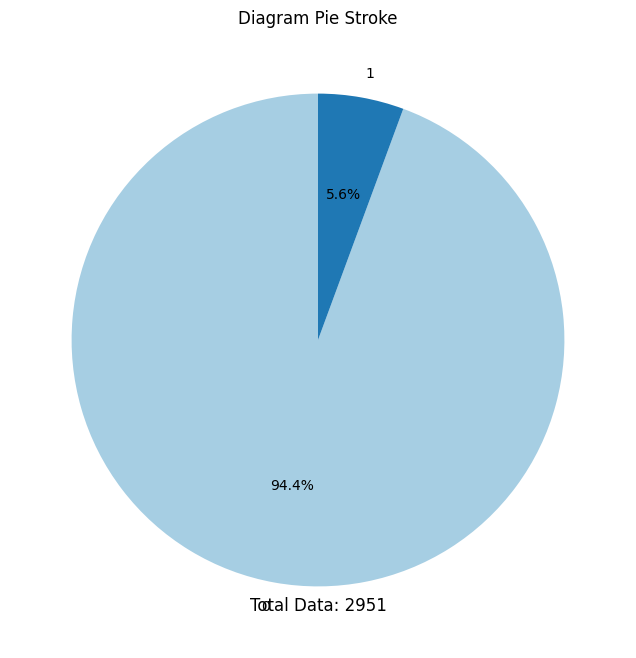

In [43]:
# Hitung frekuensi nilai unik dalam kolom 'stroke'
stroke_counts = df['stroke'].value_counts()

# Plotting diagram pie untuk kolom 'stroke'
plt.figure(figsize=(8, 8))
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Tambahkan keterangan total data
total_data = len(df['stroke'])
plt.text(0, -1.1, f'Total Data: {total_data}', fontsize=12, ha='center')

# Berikan judul
plt.title('Diagram Pie Stroke')

# Tampilkan diagram
plt.show()

In [44]:
# Langkah 1: Pilih sampel minoritas
minority_class = X[y == 1]

# Tampilkan jumlah sampel minoritas
print("Jumlah Sampel Minoritas (Stroke=1):", len(minority_class))


Jumlah Sampel Minoritas (Stroke=1): 166


In [45]:
print(df.dtypes)

gender                             int64
age                               object
hypertension                       int64
heart_disease                      int64
ever_married                       int64
work_type_Govt_job                 int64
work_type_Private                  int64
work_type_Self-employed            int64
Residence_type                     int64
avg_glucose_level                 object
bmi                               object
smoking_status_Unknown             int64
smoking_status_formerly smoked     int64
smoking_status_never smoked        int64
smoking_status_smokes              int64
stroke                             int64
dtype: object


In [38]:
# # Ganti koma dengan titik pada kolom yang mengandung nilai numerik
# df[['age', 'avg_glucose_level', 'bmi']] = df[['age', 'avg_glucose_level', 'bmi']].astype(str).apply(lambda x: x.str.replace(',', '.').astype(float))

# Langkah 2: Hitung Jarak
nn = NearestNeighbors(n_neighbors=2)
nn.fit(minority_class)
distances, indices = nn.kneighbors(X)

# Tampilkan hasil perhitungan jarak
print("Hasil Perhitungan Jarak:")
print("Distances:")
print(distances)
print("Indices:")
print(indices)


ValueError: could not convert string to float: '0,9123'